In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
from PIL import ImageTk, Image
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, _ in os.walk('/content/drive/MyDrive/PCD/deteksi/Nanas'):
        print(dirname)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/content/drive/MyDrive/PCD/deteksi/Nanas
/content/drive/MyDrive/PCD/deteksi/Nanas/train
/content/drive/MyDrive/PCD/deteksi/Nanas/train/Busuk
/content/drive/MyDrive/PCD/deteksi/Nanas/train/Matang
/content/drive/MyDrive/PCD/deteksi/Nanas/train/Muda
/content/drive/MyDrive/PCD/deteksi/Nanas/test
/content/drive/MyDrive/PCD/deteksi/Nanas/test/Busuk
/content/drive/MyDrive/PCD/deteksi/Nanas/test/Busuk/.ipynb_checkpoints
/content/drive/MyDrive/PCD/deteksi/Nanas/test/Matang
/content/drive/MyDrive/PCD/deteksi/Nanas/test/Muda


In [ ]:
train_path = "/content/drive/MyDrive/PCD/deteksi/Nanas/train/"
test_path = "/content/drive/MyDrive/PCD/deteksi/Nanas/test/"

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from glob import glob

In [ ]:
x_data = []
y_data = []

for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split("/")[-1])

data=pd.DataFrame({'image': x_data,'label': y_data})

100%|██████████| 100/100 [00:00<00:00, 223.83it/s]


In [ ]:
data.shape

(241, 2)

In [ ]:
from collections import Counter
Counter(y_data)

Counter({'Busuk': 41, 'Matang': 100, 'Muda': 100})

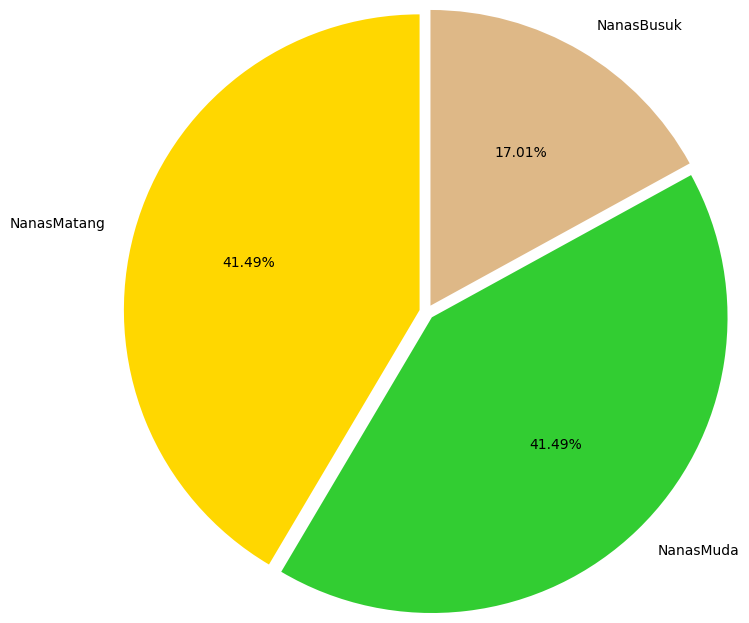

In [ ]:
colors = ['#ffd700','#32cd32', '#deb887']
plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05,0.05],autopct='%0.2f%%',
        labels=['NanasMatang', 'NanasMuda', 'NanasBusuk'], colors= colors,radius=2)
plt.show()

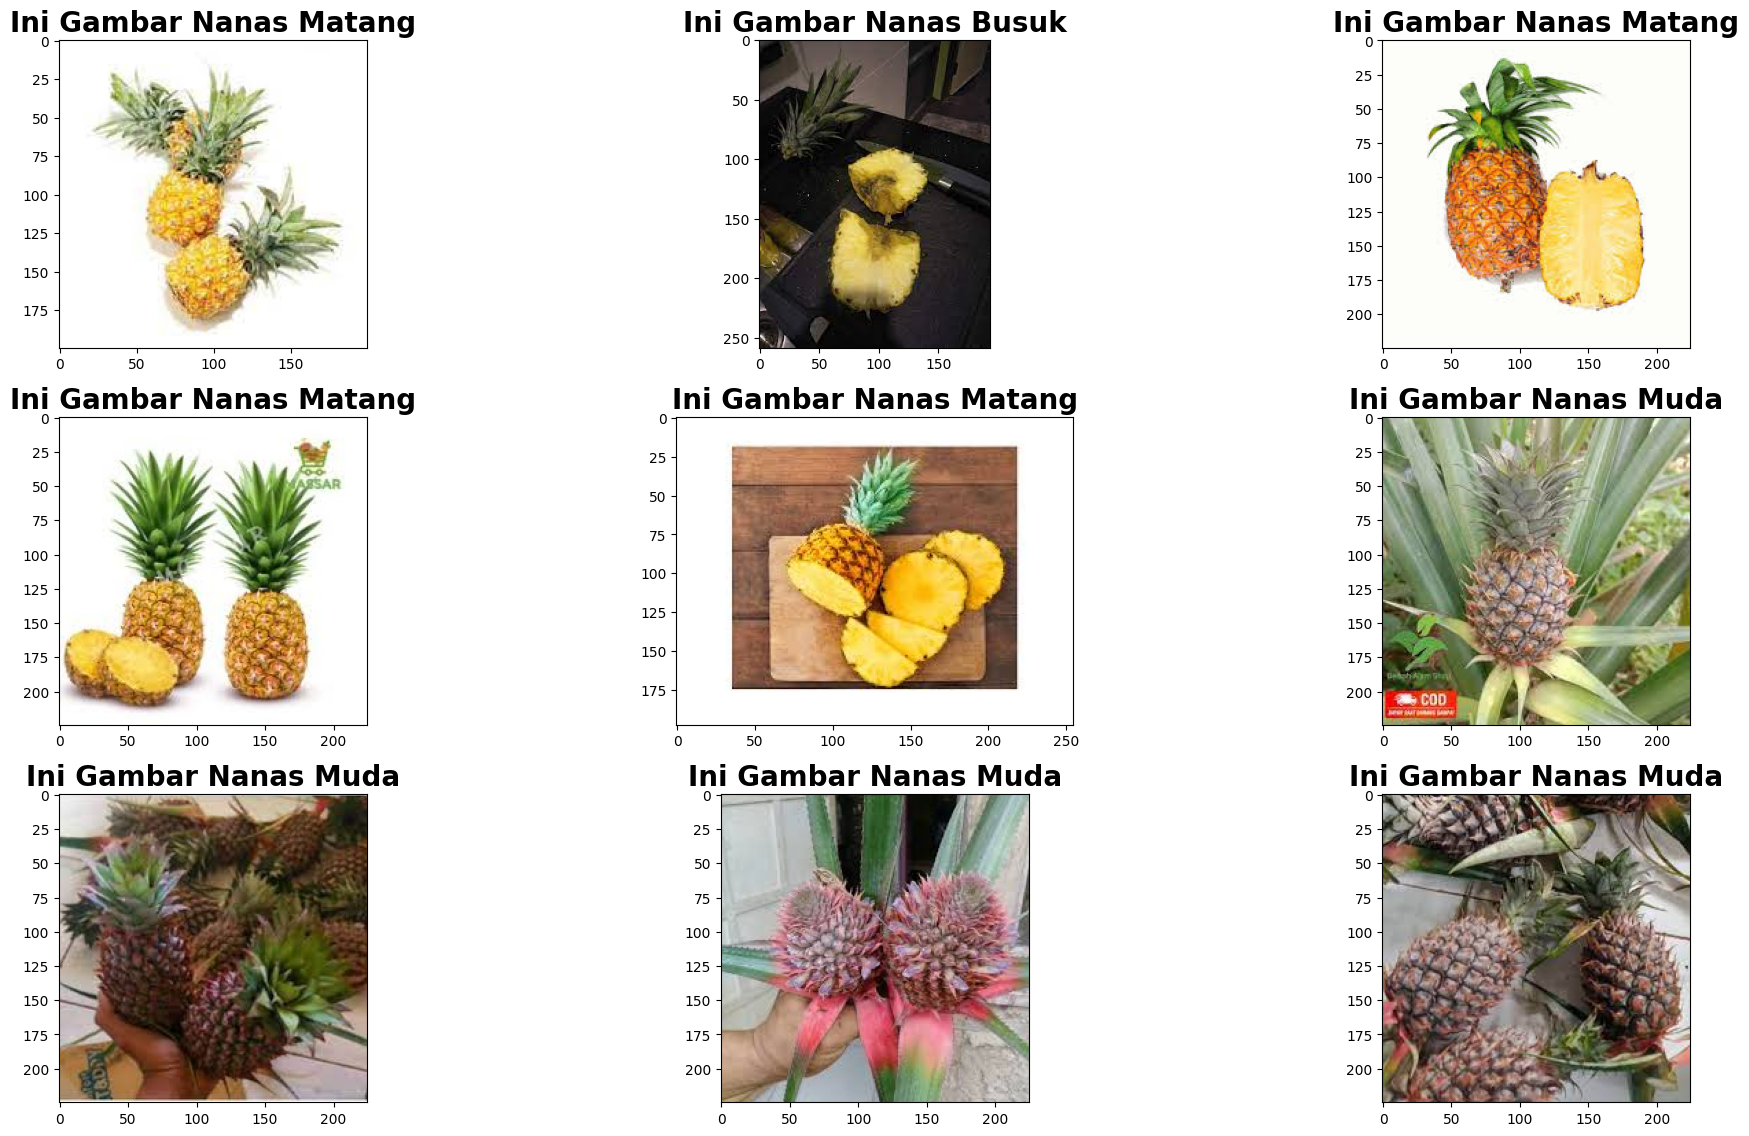

In [ ]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(200)
    plt.title('Ini Gambar Nanas {0}'.format(data.label[index]),fontdict={'size':20,'weight':'bold'})
    plt.imshow(data.image[index])
    plt.tight_layout()

In [ ]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  3


In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (224,224,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output
model.add(Activation("sigmoid"))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

batch_size = 256

In [ ]:
train_datagen = ImageDataGenerator(rescale= 1./255)
test_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 240 images belonging to 3 classes.
Found 240 images belonging to 3 classes.


In [ ]:
hist = model.fit_generator(
        generator = train_generator,
        epochs=20,
        validation_data = test_generator)

Epoch 1/20
1/1 [==============================] - 45s 45s/step - loss: 0.7018 - accuracy: 0.3292 - val_loss: 1.2575 - val_accuracy: 0.4125
Epoch 2/20
1/1 [==============================] - 39s 39s/step - loss: 1.5446 - accuracy: 0.4250 - val_loss: 0.8579 - val_accuracy: 0.4167
Epoch 3/20
1/1 [==============================] - 35s 35s/step - loss: 1.0623 - accuracy: 0.4000 - val_loss: 0.6598 - val_accuracy: 0.4167
Epoch 4/20
1/1 [==============================] - 35s 35s/step - loss: 0.7134 - accuracy: 0.4167 - val_loss: 0.6725 - val_accuracy: 0.5208
Epoch 5/20
1/1 [==============================] - 39s 39s/step - loss: 0.6826 - accuracy: 0.3792 - val_loss: 0.6601 - val_accuracy: 0.4250
Epoch 6/20
1/1 [==============================] - 35s 35s/step - loss: 0.6605 - accuracy: 0.4750 - val_loss: 0.6304 - val_accuracy: 0.4667
Epoch 7/20
1/1 [==============================] - 38s 38s/step - loss: 0.6252 - accuracy: 0.5083 - val_loss: 0.6033 - val_accuracy: 0.5417
Epoch 8/20
1/1 [===========

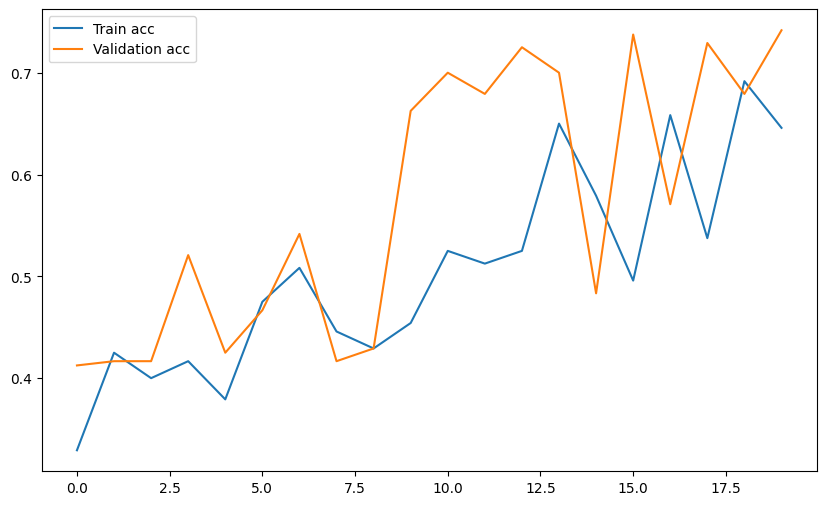

In [ ]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

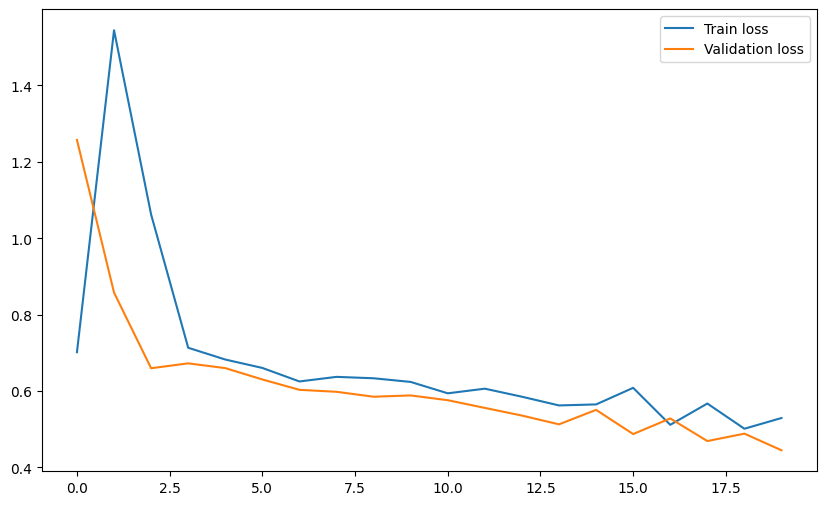

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

Model Prediction

In [ ]:
def predict_func(img):
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224,3])
    result = np.argmax(model.predict(img))
    if result == 0: print("\033[94m"+"This image -> Busuk"+"\033[0m")
    elif result == 1: print("\033[94m"+"This image -> Matang"+"\033[0m")
    elif result == 2: print("\033[94m"+"This image -> Muda"+"\033[0m")
    else: print("\033[94m"+"This image -> Not Clases"+"\033[0m")

1/1 [==============================] - 0s 89ms/step
This image -> Muda


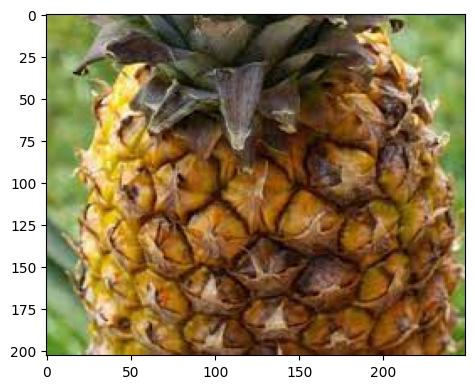

In [ ]:
test_img = cv2.imread("/content/drive/MyDrive/PCD/deteksi/Nanas/test/Busuk/contoh.jpg")
predict_func(test_img)

1/1 [==============================] - 0s 77ms/step
This image -> Muda


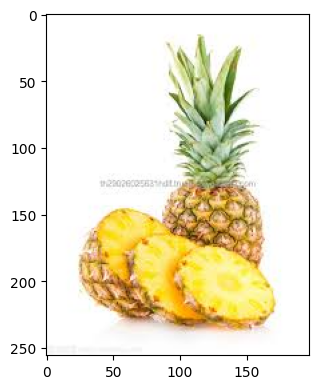

In [ ]:
test_img = cv2.imread("/content/drive/MyDrive/PCD/deteksi/Nanas/test/Matang/contoh.jpg")
predict_func(test_img)

In [ ]:
model.evaluate(test_generator)

1/1 [==============================] - 10s 10s/step - loss: 0.4450 - accuracy: 0.7417


[0.44499364495277405, 0.7416666746139526]

<Axes: >

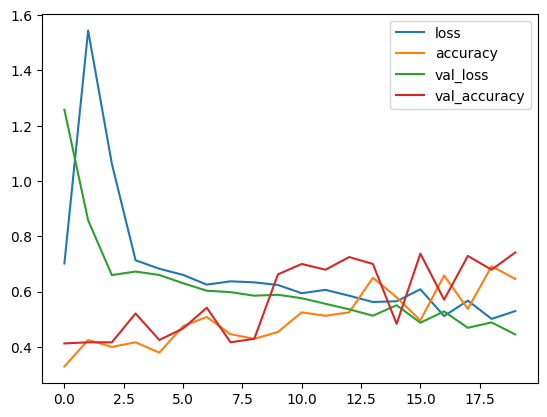

In [ ]:
pd.DataFrame(hist.history).plot()

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 activation_6 (Activation)   (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 activation_7 (Activation)   (None, 109, 109, 64)      0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                 

In [ ]:
model.save('keras_model.h5')